In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("C:/Users/niyat/Desktop/pre-processed.csv")


In [4]:
vectorizer = TfidfVectorizer(use_idf=True)


In [5]:
tfidf_vectors = vectorizer.fit_transform(df['tweets'])


In [6]:
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=vectorizer.get_feature_names_out())



In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['ClassLabel'], test_size=0.2, random_state=42)


In [8]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [10]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

In [11]:
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.85952081 0.8665826  0.86254729 0.87187894 0.86251261]
Average cross-validation score: 0.8646084495643642


In [12]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
predictions = clf.predict(X_test)


In [15]:
accuracy = accuracy_score(y_test, predictions)


In [16]:
print(f'Test accuracy: {accuracy}')


Test accuracy: 0.8761347589267702


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.05      0.09       287
           1       0.88      0.98      0.93      3851
           2       0.88      0.67      0.76       819

    accuracy                           0.88      4957
   macro avg       0.75      0.57      0.59      4957
weighted avg       0.86      0.88      0.85      4957



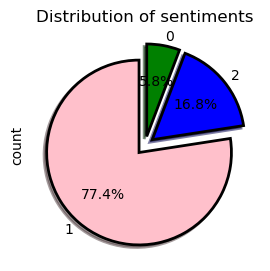

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3, 3))
colors = ("pink", "blue","green")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = df['ClassLabel'].value_counts()
explode = tuple([0.1] * len(tags)) 
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)
plt.title('Distribution of sentiments')
plt.show()